# CNN Classification using Fashion MNIST dataset
### Ram Selvaraj | PES2UG20CS265

# 1. Importing Packages

In [22]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

# 2. Dataset Preparation

In [29]:
batch_size = 128
num_classes = 10
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [30]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [31]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3.Building a model

In [33]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 32)               

# 4.Model Training

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 1.0830 - accuracy: 0.6070 - val_loss: 0.5801 - val_accuracy: 0.7775
Epoch 2/10
469/469 [==============================] - 23s 48ms/step - loss: 0.7226 - accuracy: 0.7300 - val_loss: 0.5170 - val_accuracy: 0.8072
Epoch 3/10
469/469 [==============================] - 21s 46ms/step - loss: 0.6640 - accuracy: 0.7488 - val_loss: 0.4818 - val_accuracy: 0.8128
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.6338 - accuracy: 0.7601 - val_loss: 0.4644 - val_accuracy: 0.8317
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.6061 - accuracy: 0.7709 - val_loss: 0.4339 - val_accuracy: 0.8418
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.5843 - accuracy: 0.7803 - val_loss: 0.4261 - val_accuracy: 0.8482
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.5645 - accuracy: 0.7898 - val_loss: 0.4068 - val_accuracy:

# 5 Model Testing

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38658151030540466
Test accuracy: 0.8600000143051147


# 6 Prediction

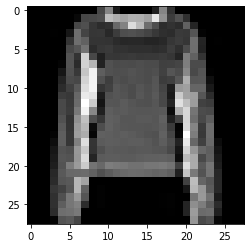

In [36]:
import pylab as plt

plt.imshow(x_test[431:432].reshape(28,28),cmap='gray')
plt.show()

# 7.Performance Measure

In [37]:
import numpy as np
prediction = model.predict(x_test[130:131])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 106ms/step
Prediction Score:
 [1.0770757e-04 2.3883529e-04 2.8147979e-02 3.5315804e-04 9.4903064e-01
 1.4951997e-05 1.9992644e-02 4.3419643e-08 2.1140848e-03 1.9878041e-09]

Thresholded Score:
 [0 0 0 0 1 0 0 0 0 0]

Predicted Digit:
 4
